# 3 Angles & Binning
This notebook provides a visualization tool for the meaning of the angles and also deeper understanding of the statistics of the orientation angles by binning the data in 5 locations. 

- overProfile(name): this function takes a cleaned dataframe and outputs an overview of the binning profile including the evolution of flow and velocity profiles.

    - name: name of saved data in the form '2228', for example.
    
- probProfile(name): gives concentration, thetay and thetaz probabilities for both types of particles, for 5 bins.

## Meaning of Angles 
Although we have an overview of the angle statistics (see 2 Initial Explore), we still need a tool to visualize what the angles mean. In future endeavors, this first code cell would be a function. The parameters that would be changed are desired thetay, thetaz, and name of simulation. 

In [15]:
# Parameters to change #
thetay, thetaz = -25, 0
name='2228'


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_pickle('DataFrames/'+name+'_CleanDF') # read clean dataframe
df1 = df[df.c.round(4) == (float(name[1])/2000) ] # divide into types of particles 
df2 = df[df.c.round(4) == (float(name[3])/2000) ]

df3 = df2[df2['thetay'].between(thetay-1, thetay+1)] # gets close to desired thetay and thetaz values  
df4 = df3[df3['thetaz'].between(thetaz-1, thetaz+1)]

R = df4['M'].iloc[0]
a = df4['a'].iloc[0]
b = df4['b'].iloc[0]
c = df4['c'].iloc[0]
D=max(a,b,c)*1.2
s,t = 2,8

ogaxis = np.array([0,0,1]).T
Vaxis=R.T.dot(ogaxis)

xp,yp,zp=0,0,0

In [20]:
def superellipsoid(x,y,z):
    f = ((((R[0][0]*(x)+R[0][1]*(y)+R[0][2]*(z))/a)**s+
          ((R[1][0]*(x)+R[1][1]*(y)+R[1][2]*(z))/b)**s)**(t/s)+
         ((R[2][0]*(x)+R[2][1]*(y)+R[2][2]*(z))/c)**t)-1    
    return f

def plot_implicit(fn, bbox=(-0.0048, 0.0048)):
    ''' create a plot of an implicit function
    fn  ...implicit function (plot where fn==0)
    bbox ..the x,y,and z limits of plotted interval'''
    import matplotlib.pyplot as plt
 
    xmin, xmax, ymin, ymax, zmin, zmax = bbox*3
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    A = np.linspace(xmin, xmax, 500) # resolution of the contour
    B = np.linspace(xmin, xmax, 50) # number of slices
    A1,A2 = np.meshgrid(A,A) # grid on which the contour is plotted

    for z in B: # plot contours in the XY plane
        X,Y = A1,A2
        Z = fn(X,Y,z)
        cset = ax.contour(X, Y, Z+z, [z], zdir='z',alpha=0.2, colors='black')
        # [z] defines the only level to plot for this contour for this value of z

    for y in B: # plot contours in the XZ plane
        X,Z = A1,A2
        Y = fn(X,y,Z)
        cset = ax.contour(X, Y+y, Z, [y], zdir='y', alpha=0.2, colors='black')

    for x in B: # plot contours in the YZ plane
        Y,Z = A1,A2
        X = fn(x,Y,Z)
        cset = ax.contour(X+x, Y, Z, [x], zdir='x',alpha=0.2,colors='black')

    # must set plot limits because the contour will likely extend
    # way beyond the displayed level.  Otherwise matplotlib extends the plot limits
    # to encompass all values in the contour.
    ax.set_zlim3d(zmin,zmax)
    ax.set_xlim3d(xmin,xmax)
    ax.set_ylim3d(ymin,ymax)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title(r'$\theta_y =$' +str(thetay)+ ' and ' + r'$\theta_z =$'+str(thetaz))
    
    
    ## plot the principal axis #
    ax.plot([-Vaxis[0]*D,Vaxis[0]*D], [-Vaxis[1]*D,Vaxis[1]*D], [-Vaxis[2]*D,Vaxis[2]*D], color='black')
    ax.scatter(-Vaxis[0]*D, -Vaxis[1]*D, -Vaxis[2]*D, marker='o', s=50, c='black')
    ax.scatter(Vaxis[0]*D, Vaxis[1]*D, Vaxis[2]*D, marker='d', s=50, c='black')
    
    #projection in xy plane (at z=zp-D)
    ax.plot([-Vaxis[0]*D,+Vaxis[0]*D],[-Vaxis[1]*D,+Vaxis[1]*D],[-D,-D], '--', c='tab:blue')
    ax.plot([-Vaxis[0]*D,-Vaxis[0]*D],[-Vaxis[1]*D,-Vaxis[1]*D],[-Vaxis[2]*D,-D], ':', c='tab:blue')
    ax.plot([+Vaxis[0]*D,+Vaxis[0]*D],[+Vaxis[1]*D,+Vaxis[1]*D],[+Vaxis[2]*D,-D], ':', c='tab:blue')

    #projection in xz plane at y=yp+D
    ax.plot([-Vaxis[0]*D,+Vaxis[0]*D],[+D,+D],[-Vaxis[2]*D,+Vaxis[2]*D], '--', c='tab:blue')
    ax.plot([-Vaxis[0]*D,-Vaxis[0]*D],[-Vaxis[1]*D,+D],[-Vaxis[2]*D,-Vaxis[2]*D], ':', c='tab:blue')
    ax.plot([+Vaxis[0]*D,+Vaxis[0]*D],[+Vaxis[1]*D,+D],[+Vaxis[2]*D,+Vaxis[2]*D], ':', c='tab:blue')

    #projection in yz plane (at x=xp+D)
    ax.plot([+D,+D],[-Vaxis[1]*D,+Vaxis[1]*D],[-Vaxis[2]*D,+Vaxis[2]*D], '--', c='tab:blue')
    ax.plot([-Vaxis[0]*D,+D],[-Vaxis[1]*D,-Vaxis[1]*D],[-Vaxis[2]*D,-Vaxis[2]*D], ':', c='tab:blue')
    ax.plot([+Vaxis[0]*D,+D],[+Vaxis[1]*D,+Vaxis[1]*D],[+Vaxis[2]*D,+Vaxis[2]*D], ':', c='tab:blue')

    #projection of slope
    ax.plot([+0.0048,-0.0048],[-0.0048,-0.0048],[-0.0048,-0.4366724366889278*0.0048],'-',c='dimgray',linewidth=2.5)
    ax.plot([+0.0048,-0.0048],[+0.0048,+0.0048],[-0.0048,-0.4366724366889278*0.0048],'--',c='dimgray',linewidth=2.5)
    ax.plot([-0.0048,-0.0048],[-0.0048,+0.0048],[-0.4366724366889278*0.0048,-0.4366724366889278*0.0048], '-', c='dimgray', linewidth=2.5)
    ax.plot([-0.0048,-0.0048],[-0.0048,-0.0048],[-0.4366724366889278*0.0048,-0.0048 ],'-', c='dimgray', linewidth=2.5)
    
    ax.view_init(azim=225)
#     plt.savefig('exampleparticle.png', bbox_inches='tight')
    return 

<ipython-input-20-a2c757df9b67>:23: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y, Z+z, [z], zdir='z',alpha=0.2, colors='black')
<ipython-input-20-a2c757df9b67>:29: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y+y, Z, [y], zdir='y', alpha=0.2, colors='black')
<ipython-input-20-a2c757df9b67>:34: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X+x, Y, Z, [x], zdir='x',alpha=0.2,colors='black')


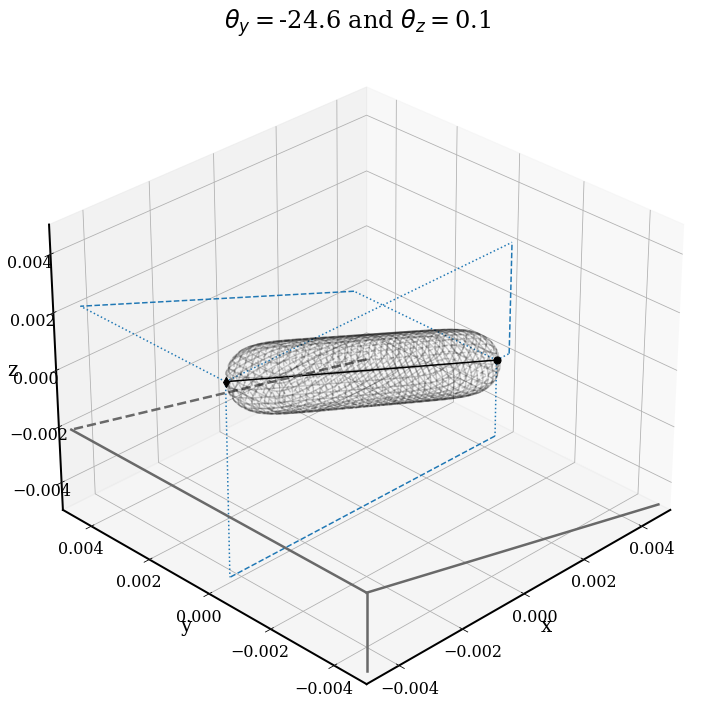

In [21]:
plot_implicit(superellipsoid)

We can also plot the meaning of the angles in their numerical sense.

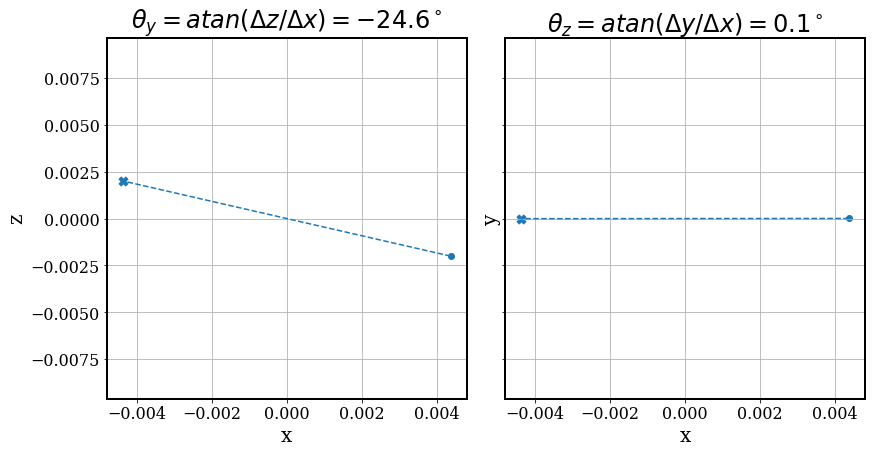

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,12), sharey=True) # shared y axis
ax1.set_box_aspect(1), ax2.set_box_aspect(1)

ax1.set(xlim=(-D,D), ylim=(-2*D,2*D)) # set limit of x and y axis

# plots thetay #
ax1.plot([xp-Vaxis[0]*D,xp+Vaxis[0]*D],[zp-Vaxis[2]*D,zp+Vaxis[2]*D], '--')
ax1.scatter(xp-Vaxis[0]*D, zp-Vaxis[2]*D, c='tab:blue',marker='o')
ax1.scatter(xp+Vaxis[0]*D, zp+Vaxis[2]*D, c='tab:blue', s=80,marker='X')
ax1.set_xlabel('x'), ax1.set_ylabel('z')
thetay = df4['thetay'].iloc[0].round(1)
ax1.set_title(r'$\theta_y = atan(\Delta{z}/\Delta{x})={' +str(thetay)+ '}^\circ$')

# plots thetaz #
ax2.plot([xp-Vaxis[0]*D, xp+Vaxis[0]*D], [yp-Vaxis[1]*D, yp+Vaxis[1]*D], '--')
ax2.scatter(xp-Vaxis[0]*D, yp-Vaxis[1]*D,c='tab:blue', marker='o')
ax2.scatter(xp+Vaxis[0]*D, yp+Vaxis[1]*D,c='tab:blue', s=80,marker='X' )
ax2.set_xlabel('x'), ax2.set_ylabel('y')
thetaz = df4['thetaz'].iloc[0].round(1)
ax2.set_title(r'$\theta_z = atan(\Delta{y}/\Delta{x})={' +str(thetaz)+ '}^\circ$')

plt.savefig('exampleangles.png', bbox_inches='tight')
plt.show()

## Section Function 
Now, we want to be able to divide all the simulations into 5 sections to more deeply analyze each section and determine if there are any noticeable differences between them. I chose sections with a length of 25 particles (taking 0.002 m as dimension) because we have some very short data that does not allow 50-100 particle length sections. This function is important for the remaining code in this notebook. 

In [7]:
def section(df):
    '''section: takes a dataframe and divides it into 5 sections.'''
    import pandas as pd 
    df1 = df[(df.xprime > df.xprime.min()+0.015) & (df.xprime < df.xprime.min()+0.045)]
    df2 = df[(df.xprime > (df.xprime.min()+df.xprime.mean())/2-0.015) & (df.xprime < (df.xprime.min()+df.xprime.mean())/2+0.015)]
    df3 = df[(df.xprime > df.xprime.mean()-0.015) & (df.xprime < df.xprime.mean()+0.015)]
    df4 = df[(df.xprime > (df.xprime.mean()+df.xprime.max())/2-0.015) & (df.xprime < (df.xprime.mean()+df.xprime.max())/2+0.015)] 
    df5 = df[(df.xprime < df.xprime.max()-0.015) & (df.xprime > df.xprime.max()-0.045)]
    return df1, df2, df3, df4, df5

## Overview Profiles of Bins: Location, Velocity, Flow Evolution

In [8]:
def overProfile(name):
    '''overProfile: this function takes a cleaned dataframe and outputs an overview of the binning profile including the evolution of flow and velocity profiles.'''
    import pandas as pd
    import matplotlib.pyplot as plt
    import numpy as np
    
    def section(df): # import this function bc it doesn't run in other notebooks without it #
        '''section: takes a dataframe and divides it into 5 sections.'''
        df1 = df[(df.xprime > df.xprime.min()+0.015) & (df.xprime < df.xprime.min()+0.045)]
        df2 = df[(df.xprime > (df.xprime.min()+df.xprime.mean())/2-0.015) & (df.xprime < (df.xprime.min()+df.xprime.mean())/2+0.015)]
        df3 = df[(df.xprime > df.xprime.mean()-0.015) & (df.xprime < df.xprime.mean()+0.015)]
        df4 = df[(df.xprime > (df.xprime.mean()+df.xprime.max())/2-0.015) & (df.xprime < (df.xprime.mean()+df.xprime.max())/2+0.015)] 
        df5 = df[(df.xprime < df.xprime.max()-0.015) & (df.xprime > df.xprime.max()-0.045)]
        return df1, df2, df3, df4, df5

    df = pd.read_pickle('DataFrames/'+name+'_CleanDF')
    
    # Create Figure and set Axis #
    fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2,2, figsize=(15,15))
    ax1.set_box_aspect(1), ax2.set_box_aspect(1), ax3.set_box_aspect(1), ax4.set_box_aspect(1)
    ax1.margins(x=0, y=0), ax2.margins(y=0), ax3.margins(y=0), ax4.margins(y=0)
    ax3.axvline(x=0, color='black', ls='--'), ax4.axvline(x=0, color='black', ls='--')
    ax1.set(xlabel='X', ylabel='Z'), ax2.set(xlabel='Frame', ylabel='Z\'')
    ax3.set(xlabel='$U\'$', ylabel='$Z\'$'), ax4.set(xlabel='$U\'/U_{max}$', ylabel='$Z\'$')
    plt.suptitle(str(name[0]) + 'x' + str(name[1]) + ' and '+str(name[2]) + 'x' + str(name[3]) + 'mm Particles')
    
    # Plot All Data on ax1 #
    sns.scatterplot(data=df, x='x', y='z', s=2, ax=ax1, color='lavender')
    
    # Set up Bin Colors #    
    colors = ['red', 'orange', 'green', 'blue', 'purple']
    ax1.set_prop_cycle(color=colors), ax2.set_prop_cycle(color=colors), ax3.set_prop_cycle(color=colors), ax4.set_prop_cycle(color=colors)
    
    # Calculate ax2: Evolution of Flow #
    mean_z = [[],[],[],[],[]]
    for frame in range(100):
        df = pd.read_pickle('DataFrames/'+name+'/CleanDF_'+str(frame))           # Get each dataframe at time 0-99
        dataframes = section(df)                                                     # Divide dataframe into sections
        for _bin_, df in enumerate(dataframes):
            df1 = df[df.zprime < 2.01*df.zprime.mean()]                              # Delete Floating Particles
            mean_z[_bin_].append(df.zprime.mean())                                   # Append average height 

    t = np.arange(0,100,1)                                                            # Create time for x axis
    for i in range(5):
        ax2.plot(t, mean_z[i])                                                        # Plot on ax2
    
    # Calculate ax3 and ax4: Velocity Profiles #
    df = pd.read_pickle('DataFrames/'+name+'_CleanDF')
    dataframes = section(df)
    for _bin_, df in enumerate(dataframes):
        df1 = df[df.zprime < 2.01*df.zprime.mean()]                                   # Delete Floating Particles
        sns.scatterplot(data=df1,ax=ax1, x='x', y='z', s=2, label='Bin'+str(_bin_+1)) # Plot Bins on ax1
        sns.scatterplot(data=df1,ax=ax3, x='uprime', y='zprime',s=2)                  # Plot all velocities
        
        bin_num = int(df1.zprime.max()/0.005)                                         # Bin 2-3 Particles in Length
        df1 = df1.sort_values(by=['zprime'])                                          # Divide into Bins
        df1['bin'] = pd.cut(df1.zprime,bin_num, include_lowest = True)
        group = df1.groupby('bin')
        dfs1 = [group.get_group(zprime) for zprime in group.groups]
        
        a = dfs1[0].uprime.mean()                                                     # Calculate U'max
        for i in range(bin_num):
            b = dfs1[i].uprime.mean()
            if b > a:
                umax = b
                a = dfs1[i].uprime.mean()
                    
        mean, mean_umax, loc=[],[],[]
        for i in range(bin_num):                                                      
            mean.append(dfs1[i].uprime.mean())                                        # Calculate U' mean
            mean_umax.append(dfs1[i].uprime.mean()/umax)                              # Calculate U'/U'max mean
            loc.append(dfs1[i].bin.iloc[0].mid)                                       # Calculate bin location
        ax3.plot(mean,loc, linewidth=2, marker='o')                                   # Plot U' mean vs. Z'
        ax4.plot(mean_umax,loc,linewidth=2,marker='o')                                # Plot U'/U'max mean vs Z'
    ax1.legend(markerscale=10)
    
    plt.savefig('Figures/overProfile/'+name+'.png', dpi=300)                          # Save figure
    return plt.show()

We can now compare the data with each other and visualize where the bins lie. 

![](kinematics.png)

As expected, a noticeable aspect of all the data is that the velocity profiles show a decrease in velocity as we continue down the slope. In addition, the 

## Probability Profiles of Bins: Location, Concentration, Probability Distributions

Similar to the approach investigating the kinematics of the granular flow, we can divide the simulation into five bins. Statistics like this were generated for five bins over multiple simulations. 

In [9]:
def probProfile(name):
    '''probProfile: gives concentration, thetay and thetaz probabilities for both types of particles, for 5 bins.'''
    from matplotlib.cm import get_cmap
    import seaborn as sns
    import pandas as pd
    import matplotlib.pyplot as plt
    import numpy as np
    
    def section(df): # import this function bc it doesn't run in other notebooks without it #
        '''section: takes a dataframe and divides it into 5 sections.'''
        df1 = df[(df.xprime > df.xprime.min()+0.015) & (df.xprime < df.xprime.min()+0.045)]
        df2 = df[(df.xprime > (df.xprime.min()+df.xprime.mean())/2-0.015) & (df.xprime < (df.xprime.min()+df.xprime.mean())/2+0.015)]
        df3 = df[(df.xprime > df.xprime.mean()-0.015) & (df.xprime < df.xprime.mean()+0.015)]
        df4 = df[(df.xprime > (df.xprime.mean()+df.xprime.max())/2-0.015) & (df.xprime < (df.xprime.mean()+df.xprime.max())/2+0.015)] 
        df5 = df[(df.xprime < df.xprime.max()-0.015) & (df.xprime > df.xprime.max()-0.045)]
        return df1, df2, df3, df4, df5
    
    df_og = pd.read_pickle('DataFrames/'+name+'_CleanDF')
    df_og = df_og.assign(V = lambda x: (1.379061249756*x['a']*x['b']*x['c'])) #calculate volume#

    dataframes = section(df_og)
    for _bin_, df in enumerate(dataframes): 
        # Creatte Figure #
        fig, ([ax0, ax1], [ax2, ax3], [ax4, ax5]) = plt.subplots(3,2,figsize=(8,12))
        ax0.set_box_aspect(1), ax1.set_box_aspect(1), ax2.set_box_aspect(1), ax3.set_box_aspect(1), ax4.set_box_aspect(1), ax5.set_box_aspect(1)
        ax0.set(title='$Z\' $' +' Bins')
        ax1.set(xlim=(0,1))
        ax2.set(xlim=(-120,120), ylim=(0,0.0085), title=str(name[0]) + 'x' + str(name[1] +'mm'), xlabel=r'$\theta_y$')
        ax3.set(xlim=(-120,120), ylim=(0,0.0085), title=str(name[0]) + 'x' + str(name[1] +'mm'), xlabel=r'$\theta_z$')
        ax4.set(xlim=(-120,120), ylim=(0,0.045), title=str(name[2]) + 'x' + str(name[3] +'mm'), xlabel=r'$\theta_y$')
        ax5.set(xlim=(-120,120), ylim=(0,0.028), title=str(name[2]) + 'x' + str(name[3] +'mm'), xlabel=r'$\theta_z$')
        ax4.axvline(x=-25, color='green', linestyle='--') #slope line#
    
        sns.scatterplot(data=df_og, x='x', y='z',ax=ax0, color='lavender', alpha=0.1, s=2)
        cmap = get_cmap('Paired') # Make sure histograms colors correspond to bins #
        colors = cmap.colors
        ax0.set_prop_cycle(color=colors), ax2.set_prop_cycle(color=colors), ax3.set_prop_cycle(color=colors), ax4.set_prop_cycle(color=colors), ax5.set_prop_cycle(color=colors)

        df0 = df[df.zprime < 2.01*df.zprime.mean()] # Delete floating particles #
        bin_num = int(df0.zprime.max()/0.005)       # calculate bin number #
    
        df1 = df0[df0.c.round(4) == (float(name[1])/2000) ] # divide into types of particles #
        df2 = df0[df0.c.round(4) == (float(name[3])/2000) ]

        # divide both particles into zprime bins #
        df1_z = df1.sort_values(by=['zprime'])
        df1_z['bin'] = pd.cut(df1_z.zprime,bin_num, include_lowest = True)
        group = df1_z.groupby('bin')
        dfs1_z = [group.get_group(zprime) for zprime in group.groups]

        df2_z = df2.sort_values(by=['zprime'])
        df2_z['bin'] = pd.cut(df2_z.zprime,bin_num, include_lowest = True)
        group = df2_z.groupby('bin')
        dfs2_z = [group.get_group(zprime) for zprime in group.groups]
    
        # create and plot pdfs #
        for i in range(bin_num):
            sns.scatterplot(data=dfs1_z[i], x='x', y='z', ax=ax0, s=2)

            sns.kdeplot(data=dfs1_z[i], x='thetay', ax=ax2)
            sns.kdeplot(data=dfs1_z[i], x='thetaz', ax=ax3)

            sns.kdeplot(data=dfs2_z[i], x='thetay', ax=ax4)
            sns.kdeplot(data=dfs2_z[i], x='thetaz', ax=ax5)

        # calculate and plot concentrations #
        count1, division1 = np.histogram(df1['zprime'], bins=bin_num)
        count2, division2 = np.histogram(df2['zprime'], bins=bin_num)
        conc1, conc2=[],[]
        for i in range(len(count1)):
            conc1.append((count1[i]*df1.V.iloc[i])/(count1[i]*df1.V.iloc[i]+count2[i]*df2.V.iloc[i]))
            conc2.append((count2[i]*df2.V.iloc[i])/(count1[i]*df1.V.iloc[i]+count2[i]*df2.V.iloc[i]))
        bin_centers = 0.5*(division1[1:] + division1[:-1])
        ax1.plot(conc1, bin_centers, color='silver', marker='o', label=str(name[0]) + 'x' + str(name[1]) + 'mm')
        ax1.plot(conc2, bin_centers, color='black',  marker='o', label=str(name[2]) + 'x' + str(name[3]) + 'mm')
        ax1.legend()
        plt.savefig('Figures/probProfile/'+name+'_'+str(_bin_)+'.png' , dpi=300)
    return

In [ ]:
with open('filenames.txt') as file:
    for name in file:
        probProfile(name.rstrip('\n'))

![](bins.png)


There is no apparent pattern correlation to the bin location or depth associated with the disks. For the rods, as x^' increases, there was no notable effect on angle statistics. However, for z^', the middle layers had the strongest probability functions for almost all simulations. On average, the rod concentration increases as z^' increases. Therefore, the bottom layers have a low concentration of rod particles. The top layers have a higher velocity and movement. Both of these factors might attribute to the middle layers having the tallest peaks. 